In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from time import time
import matplotlib
import matplotlib.pyplot as plt

### Time feature data

In [3]:
model = RandomForestRegressor(n_estimators= 100,
               max_features= 'auto',
               max_depth= None,
               min_samples_split= 2,
               min_samples_leaf= 1,
               n_jobs = 15,
               bootstrap= True)

In [4]:
def return_data(fold,month,with_scaling, station_id = None):
    train_input = pd.read_csv('../data/beijing-18/time_feature'+'/fold'+str(fold)+'/train_data_'+month+'.csv.gz')
    test_input = pd.read_csv('../data/beijing-18/time_feature'+'/fold'+str(fold)+'/test_data_'+month+'.csv.gz')

    print(test_input["station_id"].unique())
    if station_id != None:
        test_input = test_input[test_input['station_id'] == station_id]
#     test_input = test_input[test_input['station_id' == ]]
    test_output = np.array(test_input['PM25_Concentration'])
    train_output = np.array(train_input['PM25_Concentration'])
    train_input= train_input.drop(['station_id','PM25_Concentration','time','filled'],axis=1)
    try:
        test_input= test_input.drop(['PM25_Concentration','station_id','time','filled'],axis=1)
    except:
        test_input= test_input.drop(['station_id','time','filled'],axis=1)
#     test_output= test_output.drop(['time'],axis=1)
    if with_scaling:
        scaler = MinMaxScaler().fit(train_input)
        train_input = pd.DataFrame(scaler.transform(train_input),columns=list(train_input.columns))
        test_input = pd.DataFrame(scaler.transform(test_input),columns=list(test_input.columns))
    return train_input,train_output,test_input,test_output

def run_model(model,train_input,train_output,test_input,test_output,ret_output):
    model.fit(np.array(train_input), train_output)
    test_pred = model.predict(np.array(test_input))
    err = mean_squared_error(test_pred, test_output, squared=False)
    mae = mean_absolute_error(test_pred, test_output)
    r2 = r2_score(test_pred, test_output)
    if ret_output:
        return (err, mae, r2), test_pred
    else:
        return (err, mae, r2)

### With scaling

In [5]:
mean_rmse, mean_mae, mean_r2 = 0, 0, 0

[1001 1003 1006 1014 1022 1024 1031 1032 1033 1034]
Fold:  1
Data received


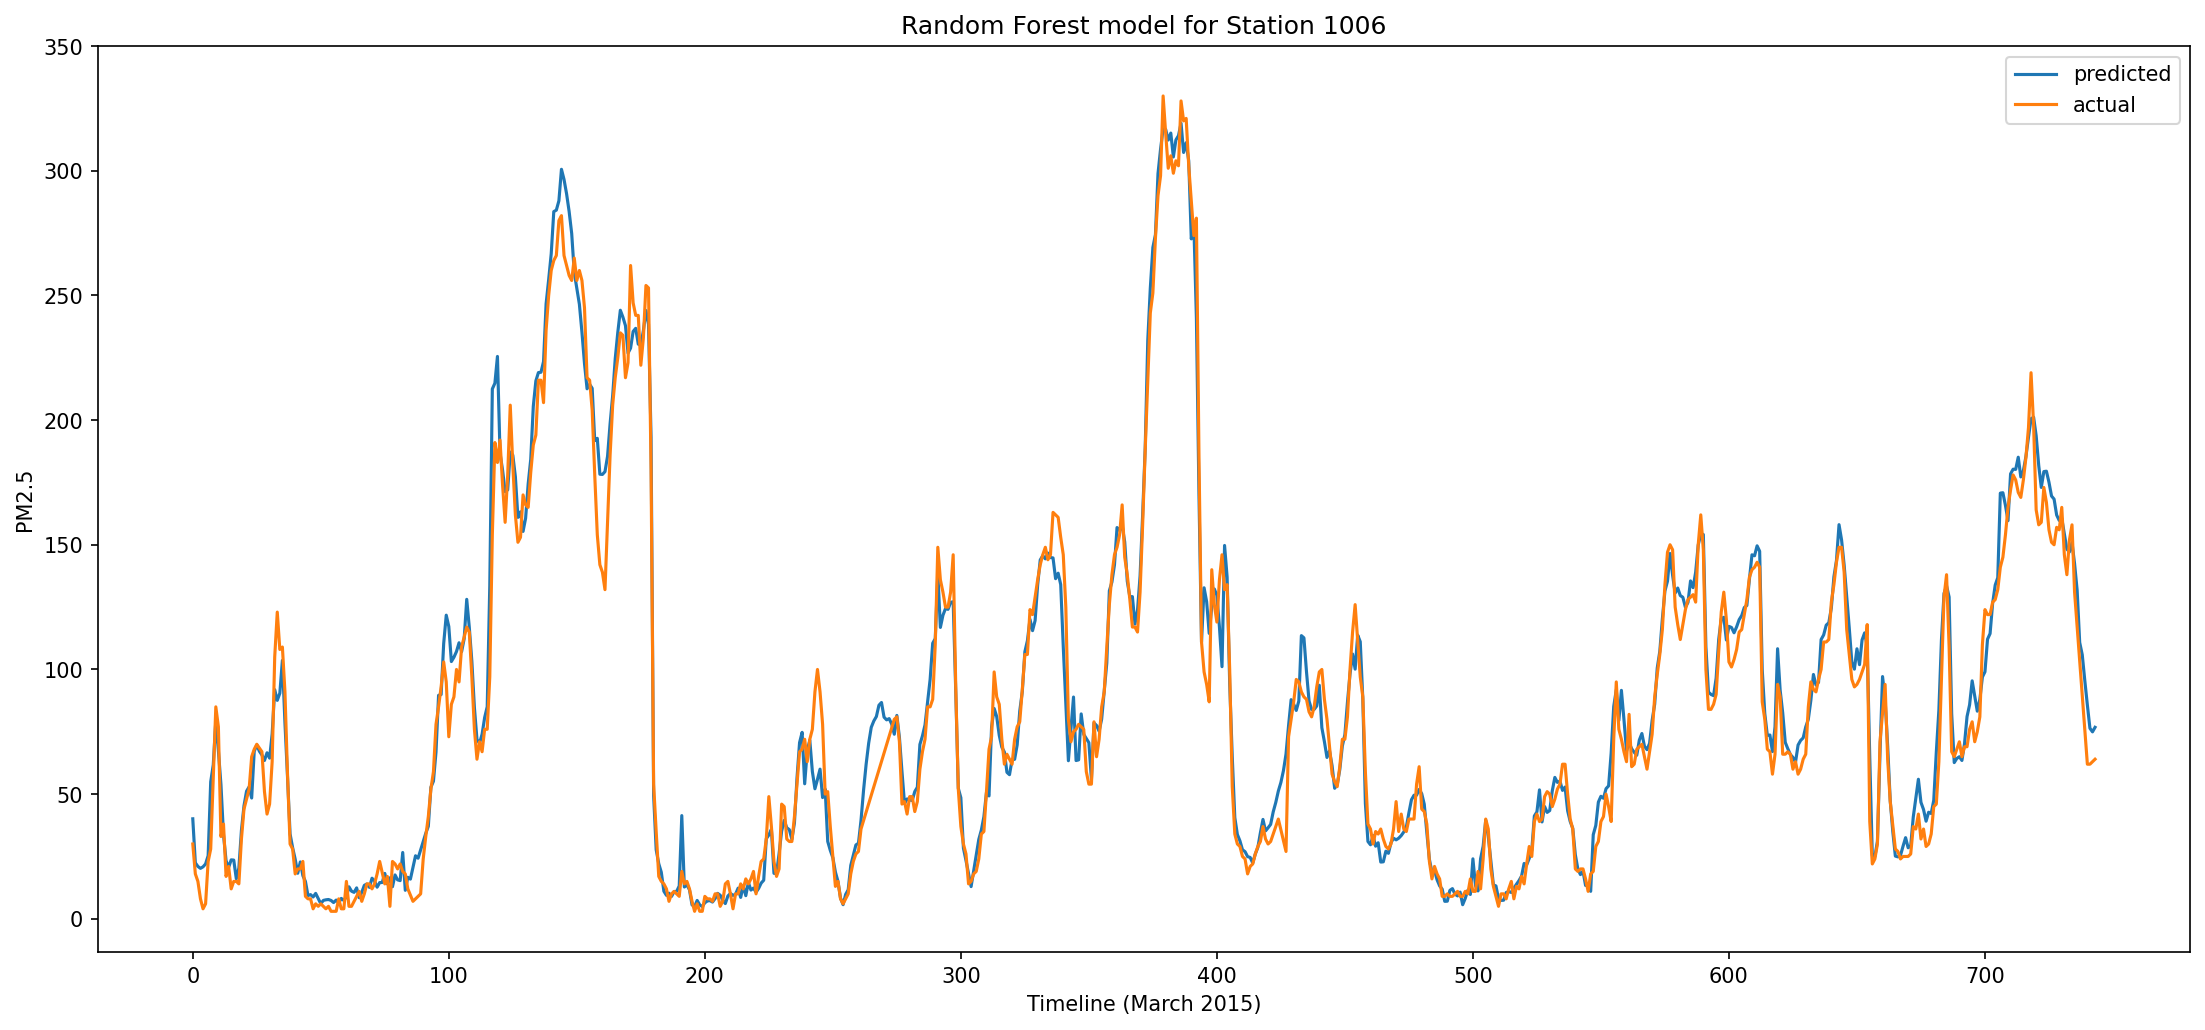

In [8]:
for fold in [1]:
    train_input,train_output,test_input,test_output = return_data(fold=fold,month='mar',with_scaling=True, station_id = 1006)
    print("Fold: ",fold)
    print("Data received")
    init = time()
    (rmse, mae, r2), test_pred = run_model(model,train_input,train_output,test_input,test_output,True)
    
    plt.rcParams['figure.dpi'] = 150
    fig = plt.figure(figsize = (18, 8))
    plt.plot(test_pred, label = "predicted", linewidth = 1.5)
    plt.plot(test_output, label = "actual", linewidth=1.5)
    # plt.plot(np.abs(test_pred - test_output), label = "difference", linewidth=1.5)
    plt.legend()
    plt.ylabel("PM2.5")
    plt.xlabel("Timeline (March 2015)")
    plt.yticks([0, 50, 100, 150, 200, 250, 300, 350])
    plt.title("Random Forest model for Station 1006")

In [ ]:
np.array([mean_rmse, mean_mae, mean_r2]) / 3

array([28.13695214, 16.17828001,  0.85196453])